# PCA on MNIST dataset and Logistic Regression
# Keerthana Shivakumar - PES1UG20CS204

# PCA  

In [1]:
#Import all libraries needed for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
print(data.head(5)) # print first five rows of data.

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

# Simplifying Given Dataset

In [2]:
l = data['label']# save the labels into a variable l.
d = data.drop("label",axis=1)# Drop the label feature and store the pixel data in d.

 # Data preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 785)


# Compute Covariance Matrix

In [4]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (785, 785)


# Compute eigenvalue and eigenvector


In [5]:
from scipy.linalg import eigh
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (785, 2)
Updated shape of eigen vectors =  (2, 785)


# Projecting the original data sample on the plane formed by two principal eigenvectors by vector-vector multiplication.

In [6]:
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates = np.vstack((new_coordinates,l)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -3.834079       5.498016    1.0
1      -1.533175      -6.018994    0.0
2      -2.425707       1.959875    1.0
3      -2.284497      -5.716447    4.0
4      -1.153826      -6.049490    0.0


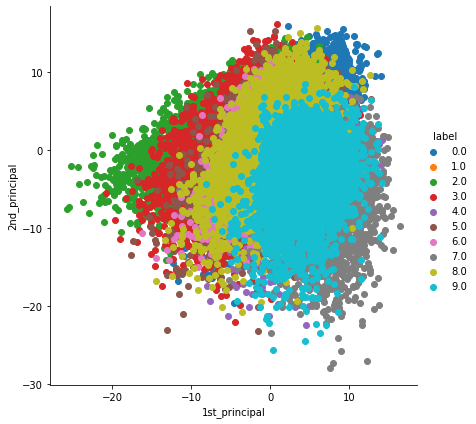

In [7]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using SciKit Learn

In [8]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [9]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
# pca_reduced will contain the 2-d projects of simple data
print("Shape of pca_reduced.shape = ", pca_data.shape)

Shape of pca_reduced.shape =  (42000, 2)


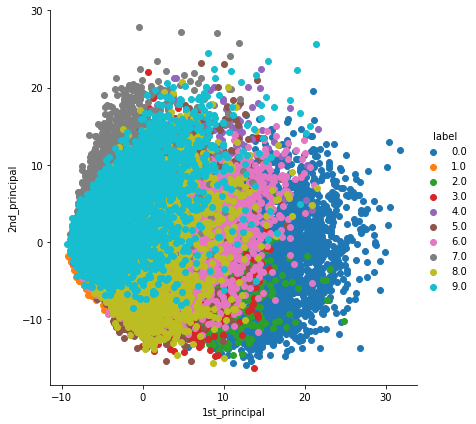

In [10]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label",height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality reduction 

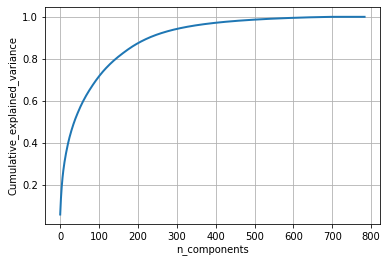

In [11]:
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
# If we take approximately 300-dimensions, approx. 90% of variance is explained.

**By applying Scikit-Learn PCA and preserving 95% of the variance, the number of features reduces from 784 to approximately 331.**

# Logistic Regression on MNIST dataset

Loading data (Digits dataset)

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()

In [13]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Showing the Images and the Labels (Digits Dataset)

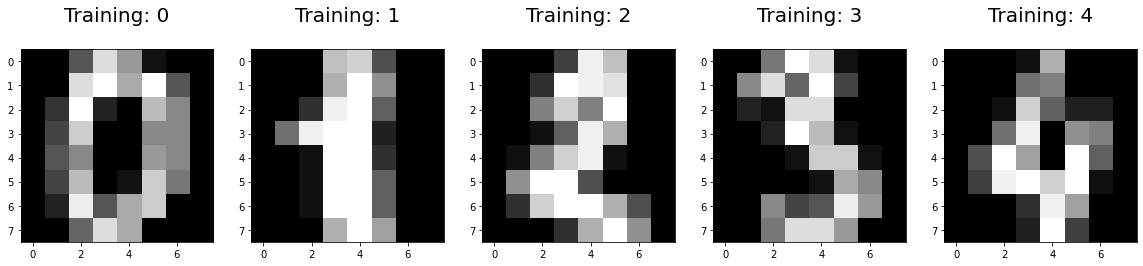

In [14]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

Split data into testing and training datasets (Digit dataset)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Import the model to be used, Make an instance of the Model and Train the model on the data, storing the information learned from the data

In [16]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

c:\users\shiva\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict labels for new data (new images)- Uses the information the model learned during the model training process

In [17]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

Predict for Multiple Observations (images) at Once

In [18]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

Make predictions on entire test data

In [19]:
predictions = logisticRegr.predict(x_test)

Measuring Model Performance (Digits Dataset)

In [20]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


# Confusion Matrix (Digits Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Confusion matrix using seaborn

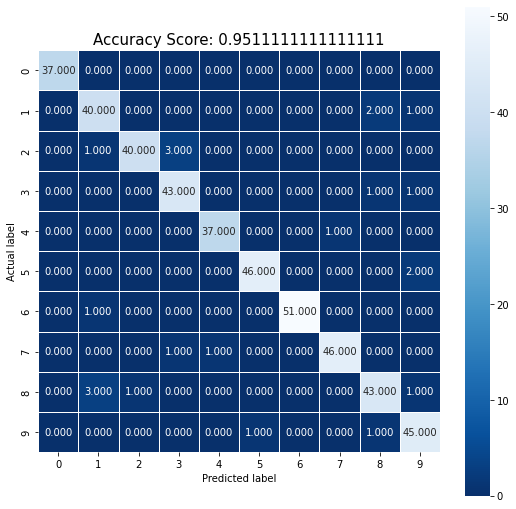

In [22]:
plt.figure(figsize=(9,9))
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Accuracy of the model is 95.11%**